In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/titanic.csv')

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print('Median of Age column: %.2f' % (dataset["Age"].median(skipna = True)))
print('Percent of missing records in the Cabin column: %.2f%%' %((dataset['Cabin'].isnull().sum()/dataset.shape[0])*100))
print('Most common boarding port of embarkation: %s' %dataset['Embarked'].value_counts().idxmax())

Median of Age column: 28.00
Percent of missing records in the Cabin column: 77.10%
Most common boarding port of embarkation: S


In [ ]:
dataset["Age"].fillna(dataset["Age"].median(skipna=True), inplace=True)
dataset["Embarked"].fillna(dataset['Embarked'].value_counts().idxmax(), inplace=True)


In [ ]:
dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket',  axis=1, inplace=True)

In [ ]:
dataset['TravelAlone']=np.where((dataset["SibSp"]+dataset["Parch"])>0, 0, 1)
dataset.drop('SibSp', axis=1, inplace=True)
dataset.drop('Parch', axis=1, inplace=True)

In [ ]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,NaN,S,0
1,1,1,female,38.0,71.2833,C85,C,0
2,1,3,female,26.0,7.9250,NaN,S,1
3,1,1,female,35.0,53.1000,C123,S,0
4,0,3,male,35.0,8.0500,NaN,S,1


In [ ]:
dataset.shape 
 

(891, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        204 non-null    object 
 6   Embarked     891 non-null    object 
 7   TravelAlone  891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
dataset.describe()

,Survived,Pclass,Age,Fare,TravelAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.602694
std,0.486592,0.836071,13.019697,49.693429,0.489615
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


male      577
female    314
Name: Sex, dtype: int64

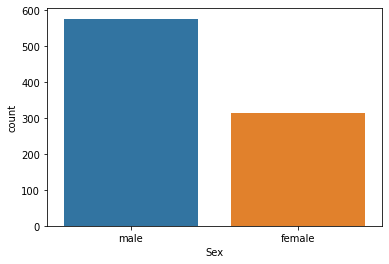

In [ ]:
sns.countplot('Sex',data=dataset)
dataset['Sex'].value_counts()

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f5451eaaed0>>

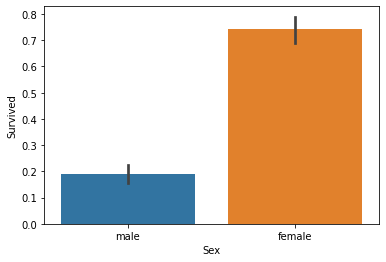

In [ ]:
sns.barplot(x='Sex',y='Survived',data=dataset)
dataset.groupby('Sex',as_index=False).Survived.mean

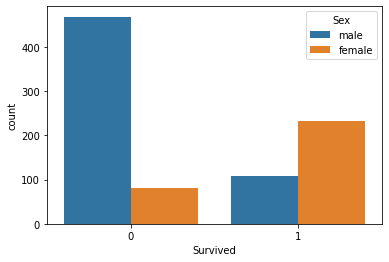

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


3    491
1    216
2    184
Name: Pclass, dtype: int64

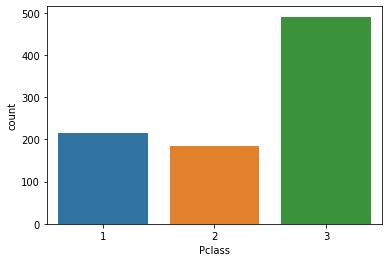

In [ ]:
sns.countplot('Pclass',data=dataset)
dataset['Pclass'].value_counts()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


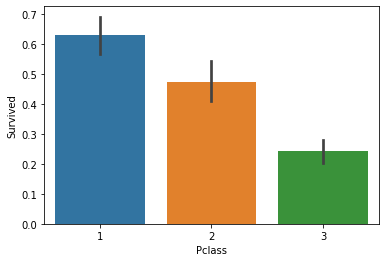

In [ ]:
sns.barplot(x='Pclass',y='Survived',data=dataset)
dataset.groupby('Pclass',as_index=False).Survived.mean()

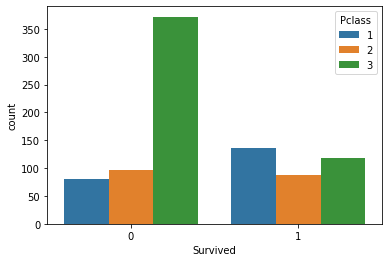

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


S    646
C    168
Q     77
Name: Embarked, dtype: int64

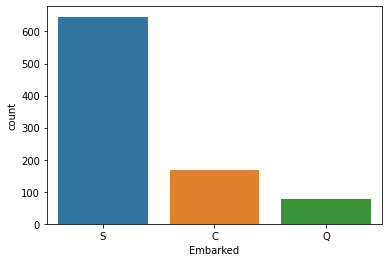

In [ ]:
sns.countplot('Embarked',data=dataset)
dataset['Embarked'].value_counts() 
